https://adventofcode.com/2022/day/7

In [1]:
import re
from pathlib import Path
from enum import Enum
from typing import Dict

import networkx as nx


class Type(Enum):
    DIR = 0
    FILE = 1


def constructFsTree(input_path: str) -> nx.DiGraph:
    with open(input_path) as f:
        lines = f.readlines()

    fs, cwd = nx.DiGraph(), Path()
    for l in lines:
        if l.strip().startswith("$"):
            # cd or ls commands
            m = re.search(r"^\$\s*(cd|ls)\s*(\S+)?\s*$", l)
            cmd = m[1]
            if cmd == "cd":
                cwd = (cwd / m[2]).resolve()
                node, parent = str(cwd), str(cwd.parent)
                if not node in fs:
                    parent = str(cwd.parent)
                    fs.add_node(node, type=Type.DIR, size=0)
                    if node != parent:
                        fs.add_edge(parent, node)
            elif cmd == "ls":
                pass
        else:
            # ls output -> search for files
            m = re.search(r"^\s*(dir|\d+)\s+([\w\.]+)\s*$", l)
            if m[1] == "dir":
                continue
            node, parent = str((cwd / m[2]).resolve()), str(cwd)
            fs.add_node(node, type=Type.FILE, size=int(m[1]))
            fs.add_edge(parent, node)
    return fs


def getDirSizes(fs: nx.DiGraph) -> Dict[str, int]:
    def computeDirSize(dir_name: str) -> int:
        return sum([fs.nodes[node]["size"] for node in nx.descendants(fs, dir_name)])

    sizes = {
        node[0]: computeDirSize(node[0])
        for node in fs.nodes(data=True)
        if node[1]["type"] is Type.DIR
    }
    return sizes


def solvePart1(fs: nx.DiGraph) -> int:
    sizes = list(getDirSizes(fs).values())
    return sum(filter(lambda x: x < 100000, sizes))


def solvePart2(fs: nx.DiGraph) -> int:
    sizes = getDirSizes(fs)
    need = 30_000_000 - (70_000_000 - sizes[str(Path("/").resolve())])
    return min(map(lambda x: sizes[x], filter(lambda x: sizes[x] >= need, sizes)))


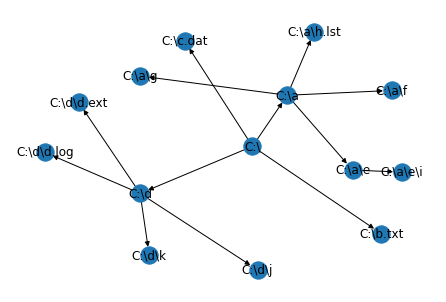

In [2]:
fs = constructFsTree("test_input.txt")
nx.draw(fs, with_labels=True)

result, expected = solvePart1(fs), 95437
assert result == expected, f"Part 1: {result=} is wrong ({expected=})"

result, expected = solvePart2(fs), 24933642
assert result == expected, f"Part 2: {result=} is wrong ({expected=})"


In [3]:
fs = constructFsTree("input.txt")
print(solvePart1(fs))
print(solvePart2(fs))

1297683
5756764
